In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder
import joblib
import optuna
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')

In [3]:
df = df.drop(columns=['id'])

In [4]:
df

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 975.8 KB


In [6]:
df.describe()

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [7]:
X = df.drop(columns=['Hardness'])
y = df['Hardness']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  train_size=0.75,
                                                  random_state=42)

print(f'Train: {X_train.shape[0]} samples \t {round(X_train.shape[0] / X.shape[0] * 100)}%')
print(f'Test:  {X_test.shape[0]} samples \t {round(X_test.shape[0] / X.shape[0] * 100)}%')
print(f'Val:   {X_val.shape[0]} samples \t {round(X_val.shape[0] / X.shape[0] * 100)}%')

Train: 6243 samples 	 60%
Test:  2082 samples 	 20%
Val:   2082 samples 	 20%


In [9]:
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median"))]
    )

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value =-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Average'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index([], dtype='object'))])

In [10]:
X_train = preprocessor.fit_transform(X_train)

X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)

In [11]:
def objective(trial):
    params = {
        'objective': 'regression',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'goss', 'rf']),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'max_depth': trial.suggest_int('max_depth', -1, 50),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'min_sum_hessian_in_leaf': trial.suggest_float('min_sum_hessian_in_leaf', 1e-3, 10.0),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0.0, 1.0),
        'max_bin': trial.suggest_int('max_bin', 15, 255),
        'boost_from_average': True,
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1e-3, 10.0),
        'is_unbalance': trial.suggest_categorical('is_unbalance', [True, False]),
        'metric': 'rmse',
        'verbosity': -1,
        'force_col_wise': trial.suggest_categorical('force_col_wise', [True, False]),
        'max_cat_threshold': trial.suggest_int('max_cat_threshold', 1, 128),
        'cat_l2': trial.suggest_float('cat_l2', 1e-3, 10.0),
        'cat_smooth': trial.suggest_float('cat_smooth', 1e-3, 10.0),
        'max_cat_to_onehot': trial.suggest_int('max_cat_to_onehot', 1, 128),
        'top_rate': trial.suggest_float('top_rate', 0.0, 1.0),
        'other_rate': trial.suggest_float('other_rate', 0.0, 1.0 - trial.suggest_float('top_rate', 0.0, 1.0)),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 1, 100),
        'max_cat_trees': trial.suggest_int('max_cat_trees', 1, 128),
        'path_smooth': trial.suggest_float('path_smooth', 0.0, 1.0),
        'feature_fraction_bynode': trial.suggest_float('feature_fraction_bynode', 0.0, 1.0),
        'tweedie_variance_power': trial.suggest_float('tweedie_variance_power', 1.0, 2.0),
    }

    model = lgb.LGBMRegressor(**params)

    early_stopping_callback = lgb.early_stopping(stopping_rounds=trial.suggest_int('early_stopping_round', 10, 100), verbose=False)

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='rmse',
        callbacks=[early_stopping_callback]
    )

    y_pred = model.predict(X_val)
    r2 = metrics.r2_score(y_val, y_pred)
    mae = metrics.mean_absolute_error(y_val, y_pred)
    rmse = metrics.mean_squared_error(y_val, y_pred) ** 0.5

    return r2, mae, rmse

In [12]:
optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(directions=['maximize', 'minimize', 'minimize'])
study.optimize(objective, n_trials=100)

In [13]:
len(study.best_trials)

1

In [14]:
print(f"найкраща метрика: {study.best_trials}")

найкраща метрика: [FrozenTrial(number=93, state=TrialState.COMPLETE, values=[0.47383252353083094, 0.9035923204272086, 1.2229327327897968], datetime_start=datetime.datetime(2024, 7, 15, 17, 23, 2, 564563), datetime_complete=datetime.datetime(2024, 7, 15, 17, 23, 2, 732640), params={'boosting_type': 'goss', 'n_estimators': 58, 'learning_rate': 0.12981738211427366, 'num_leaves': 152, 'max_depth': 34, 'min_data_in_leaf': 88, 'min_sum_hessian_in_leaf': 8.316927740184509, 'feature_fraction': 0.43231504407423255, 'lambda_l1': 1.6666077808085231e-07, 'lambda_l2': 1.1376401944849282e-05, 'min_gain_to_split': 0.2982349413015827, 'max_bin': 105, 'scale_pos_weight': 1.4594539226187357, 'is_unbalance': False, 'force_col_wise': False, 'max_cat_threshold': 45, 'cat_l2': 8.24276600061845, 'cat_smooth': 7.32361359445132, 'max_cat_to_onehot': 3, 'top_rate': 0.680007761631174, 'other_rate': 0.14174593798139282, 'min_data_per_group': 59, 'max_cat_trees': 2, 'path_smooth': 0.2227470039814614, 'feature_frac

In [15]:
data = pd.DataFrame([trial.values for trial in study.best_trials],
                    columns=['r2', 'mae', 'rmse'])

data

,r2,mae,rmse
0,0.473833,0.903592,1.222933


In [16]:
best_params = study.best_trials[0].params
best_params

{'boosting_type': 'goss',
 'n_estimators': 58,
 'learning_rate': 0.12981738211427366,
 'num_leaves': 152,
 'max_depth': 34,
 'min_data_in_leaf': 88,
 'min_sum_hessian_in_leaf': 8.316927740184509,
 'feature_fraction': 0.43231504407423255,
 'lambda_l1': 1.6666077808085231e-07,
 'lambda_l2': 1.1376401944849282e-05,
 'min_gain_to_split': 0.2982349413015827,
 'max_bin': 105,
 'scale_pos_weight': 1.4594539226187357,
 'is_unbalance': False,
 'force_col_wise': False,
 'max_cat_threshold': 45,
 'cat_l2': 8.24276600061845,
 'cat_smooth': 7.32361359445132,
 'max_cat_to_onehot': 3,
 'top_rate': 0.680007761631174,
 'other_rate': 0.14174593798139282,
 'min_data_per_group': 59,
 'max_cat_trees': 2,
 'path_smooth': 0.2227470039814614,
 'feature_fraction_bynode': 0.8755539829743962,
 'tweedie_variance_power': 1.5723348079984243,
 'early_stopping_round': 33}

In [17]:
#best_params = study.best

model = lgb.LGBMRegressor(**best_params,
                          n_estimator = 1000,
                          verbose=-1)

model.fit(X_train, y_train,
          eval_set=[(X_test, y_test), (X_train, y_train)],
          eval_metric='mae')

LGBMRegressor(boosting_type='goss', cat_l2=8.24276600061845,
              cat_smooth=7.32361359445132, early_stopping_round=33,
              feature_fraction=0.43231504407423255,
              feature_fraction_bynode=0.8755539829743962, force_col_wise=False,
              is_unbalance=False, lambda_l1=1.6666077808085231e-07,
              lambda_l2=1.1376401944849282e-05,
              learning_rate=0.12981738211427366, max_bin=105,
              max_cat...
              max_depth=34, min_data_in_leaf=88, min_data_per_group=59,
              min_gain_to_split=0.2982349413015827,
              min_sum_hessian_in_leaf=8.316927740184509, n_estimator=1000,
              n_estimators=58, num_leaves=152, other_rate=0.14174593798139282,
              path_smooth=0.2227470039814614,
              scale_pos_weight=1.4594539226187357, top_rate=0.680007761631174,
              tweedie_variance_power=1.5723348079984243, verbose=-1)

In [18]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [19]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, model.predict(X_test))

all_metrics

,train,test
MAE,0.80,0.90
RMSE,1.06,1.21
R2,0.60,0.46


In [20]:
optuna.visualization.plot_param_importances(study)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

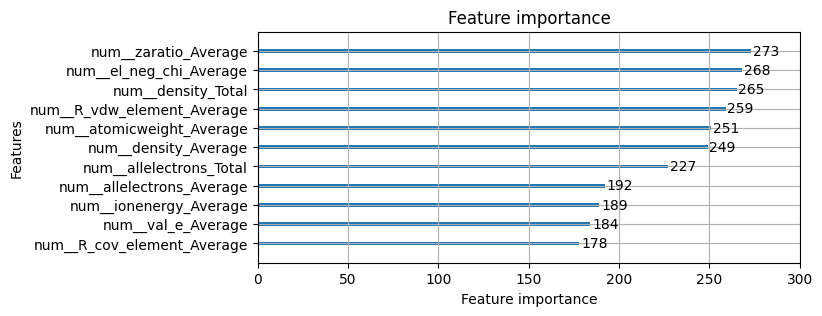

In [21]:
lgb.plot_importance(model, figsize=(7,3))

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='l1'>

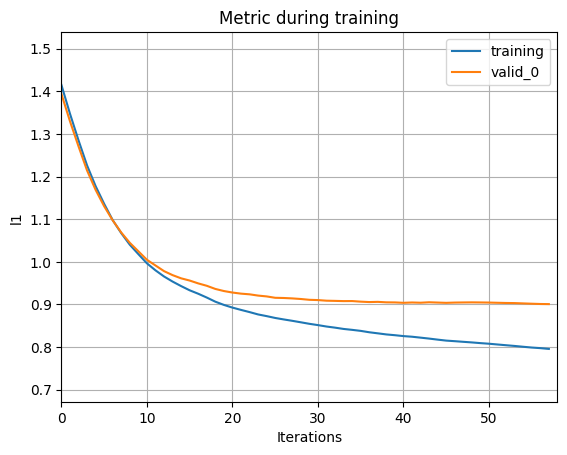

In [22]:
lgb.plot_metric(model,
                metric='l1')

In [23]:
model = Pipeline(
    [("prep", preprocessor),
     ("model", model)
     ]
)

model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Av...
                               min_data_in_leaf=88, min_data_per_group=59,
                               min_gain_to_split=0.2982349413015827,
                               min_sum_hessian_in_leaf=8.316927740184509,
                               n_estimator=1000, n_estimators=58,
                               num_leaves=152, other_rate=0.14174593798139282,
                               path_smooth=0.2227470039814614,
                               scale_pos_weight=1.4594539226187357,
                               top_rate=0.680007761631174,
                               tweedie_variance_power=1.5723348079984243,
                               verbose=-1))])

In [24]:
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']

In [25]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['allelectrons_Total', 'density_Total', 'allelectrons_Average',
       'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
       'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
       'zaratio_Average', 'density_Av...
                               min_data_in_leaf=88, min_data_per_group=59,
                               min_gain_to_split=0.2982349413015827,
                               min_sum_hessian_in_leaf=8.316927740184509,
                               n_estimator=1000, n_estimators=58,
                               num_leaves=152, other_rate=0.14174593798139282,
                               path_smooth=0.2227470039814614,
                               scale_pos_weight=1.4594539226187357,
                               top_rate=0.680007761631174,
                               tweedie_variance_power=1.5723348079984243,
                               verbose=-1))])